In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_NN_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
679,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
680,5.0,10.0,10.0,10.0,4.0,10.0,5.0,6.0,3.0
681,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	9
float64		column 2	3
float64		column 3	6
float64		column 4	6
float64		column 5	6
float64		column 6	3
float64		column 7	6
float64		column 8	9
float64		column 9	6


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,674.000000,680.000000,677.000000,677.000000,677.000000,680.000000,677.000000,674.000000,677.000000
mean,4.434718,3.150000,3.214180,2.807976,3.203840,3.533824,3.437223,2.833828,1.607090
std,2.816220,3.064044,2.985652,2.845904,2.183135,3.639746,2.450873,3.041904,1.739502
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

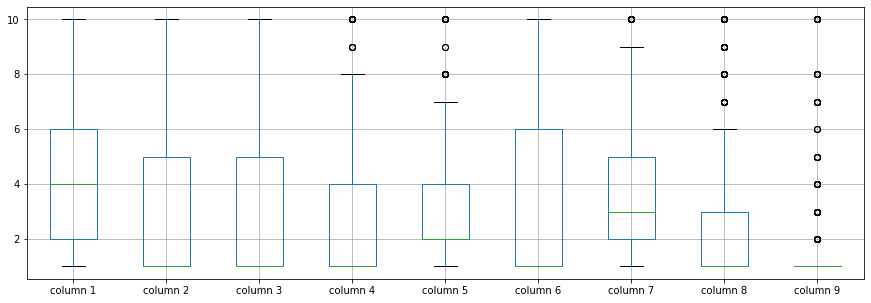

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.434718
column 2    3.150000
column 3    3.214180
column 4    2.807976
column 5    3.203840
column 6    3.533824
column 7    3.437223
column 8    2.833828
column 9    1.607090
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.637821,0.648315,0.484713,0.518991,0.592408,0.560725,0.532662,0.354411
column 2,0.637821,1.000000,0.906100,0.707380,0.753957,0.691938,0.756109,0.718659,0.457914
column 3,0.648315,0.906100,1.000000,0.682328,0.719052,0.711583,0.733594,0.715106,0.440888
column 4,0.484713,0.707380,0.682328,1.000000,0.591109,0.668363,0.664493,0.600335,0.401689
column 5,0.518991,0.753957,0.719052,0.591109,1.000000,0.585157,0.631054,0.631590,0.491011
column 6,0.592408,0.691938,0.711583,0.668363,0.585157,1.000000,0.676437,0.579790,0.338949
column 7,0.560725,0.756109,0.733594,0.664493,0.631054,0.676437,1.000000,0.663485,0.348063
column 8,0.532662,0.718659,0.715106,0.600335,0.631590,0.579790,0.663485,1.000000,0.435354
column 9,0.354411,0.457914,0.440888,0.401689,0.491011,0.338949,0.348063,0.435354,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+87,9+87+87,9+87+87,9+87+87+87+87,9+87+87+87+87+87,9+87+87+87+87+87+87,9+87+87+87+87+87,9+87+87+87+87,9+87+87+87,9+87+87,9+87,9], vae_layer = False, seed = 870)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 36.33565602983747
Epoch: 1 , loss: 36.220802806672594
Epoch: 2 , loss: 34.77373627253941
Epoch: 3 , loss: 34.180797259012856
Epoch: 4 , loss: 33.66263480413528
Epoch: 5 , loss: 32.933263642447336
Epoch: 6 , loss: 32.69159703027634
Epoch: 7 , loss: 31.855062711806525
Epoch: 8 , loss: 31.617803528195335
Epoch: 9 , loss: 30.96249485015869
Epoch: 10 , loss: 30.937939462207613
Epoch: 11 , loss: 30.065346082051594
Epoch: 12 , loss: 29.495280084155855
Epoch: 13 , loss: 28.926111493791854
Epoch: 14 , loss: 29.26770764305478
Epoch: 15 , loss: 28.57390812465123
Epoch: 16 , loss: 28.707870437985374
Epoch: 17 , loss: 28.301839056469145
Epoch: 18 , loss: 28.18183485666911
Epoch: 19 , loss: 28.1288990066165
Epoch: 20 , loss: 27.76127006894066
Epoch: 21 , loss: 28.17523229689825
Epoch: 22 , loss: 27.380138488042924
Epoch: 23 , loss: 28.044418766385032
Epoch: 24 , loss: 27.318186260405042
Epoch: 25 , loss: 27.811852046

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.0
column 2    1.0
column 3    1.0
column 4    1.0
column 5    2.0
column 6    1.0
column 7    2.0
column 8    1.0
column 9    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(27.68992630966706, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.08257559764093392

In [18]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
679,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
680,5.0,10.0,10.0,10.0,4.0,10.0,5.0,6.0,3.0
681,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0


In [20]:
imputations[-1].to_excel("BCW_NN_1(imp).xlsx", index=False, header=False)